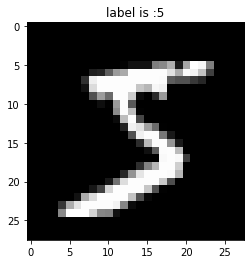

In [1]:
import os
import numpy as np
from torch.utils.data import Dataset
import gzip
import matplotlib.pyplot as plt  # 绘图库


class Mnist(Dataset):
    def __init__(self, root, train=True, transform=None):
        # 根据是否为训练集，得到文件名前缀
        self.file_pre = 'train' if train == True else 't10k'
        self.transform = transform  # 定义变换函数
        # 生成对应数据集的图片和标签文件路径
        self.label_path = os.path.join(root,
                                       '%s-labels-idx1-ubyte.gz' % self.file_pre)
        self.image_path = os.path.join(root,
                                       '%s-images-idx3-ubyte.gz' % self.file_pre)

        # 读取文件数据，返回图片和标签
        self.images, self.labels = self.__read_data__(
            self.image_path,
            self.label_path)

    def __read_data__(self, image_path, label_path):
        # 数据集读取
        with gzip.open(label_path, 'rb') as lbpath:
            labels = np.frombuffer(lbpath.read(), np.uint8,
                                   offset=8)  # 将data以流的形式读入转化成ndarray对象，ndarray对象是用于存放同类型元素的多维数组
        with gzip.open(image_path, 'rb') as imgpath:
            images = np.frombuffer(imgpath.read(), np.uint8,
                                   offset=16).reshape(len(labels), 28, 28)  # 将图片以标签文件的元素个数读取，设置大小为28*28
        return images, labels

    def __getitem__(self, index):  # 迭代使用？使用Minist()会调用_getitem_
        image, label = self.images[index], int(self.labels[index])

        # 如果需要转成 tensor，（RGB,HWC）张量， 则使用 tansform
        if self.transform is not None:
            image = self.transform(np.array(image))  # 此处需要用 np.array(image)，转化为数组
        return image, label

    def __len__(self):  # 获取元素个数
        return len(self.labels)


if __name__ == '__main__':
    # 生成实例
    train_set = Mnist(
        root=r'C:\Users\Admin\Desktop\projects\Pytorch_study\mnist识别\mnist',  # MNIST数据集路径
        #train=False,
        #"C:\Users\Admin\Desktop\projects\Pytorch_study\mnist识别\mnist\train-images.idx3-ubyte"
    )
    # 取一组数据并展示
    (data, label) = train_set[0]  # 第一组数据
    plt.imshow(data.reshape(28, 28), cmap='gray')  # 灰色图像
    plt.title('label is :{}'.format(label))
    plt.show()
